# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [169]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [170]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities= cities[0:50]
#cities

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [171]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


query_url = f"{url}appid={weather_api_key}&units={units}&q="

temp = []
lat = []
humidity = []
cloudines = []
wind =[]
for city in cities:
    response = requests.get(query_url + city).json()
    try:        
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloudines.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"ID: City:{response['id']} , City:{response['name']} processed")
    except:
        print(f"City:{city} not found")
        temp.append(np.nan)
        lat.append(np.nan)
        humidity.append(np.nan)
        cloudines.append(np.nan)
        wind.append(np.nan)
    


print(f"The temperature information received is: {temp}")
        

ID: City:5282297 , City:Bethel processed
ID: City:3424607 , City:Tasiilaq processed
ID: City:5880054 , City:Barrow processed
ID: City:4030556 , City:Rikitea processed
ID: City:3833367 , City:Ushuaia processed
ID: City:1643837 , City:Gorontalo processed
ID: City:6201424 , City:Mataura processed
ID: City:2077895 , City:Alice Springs processed
ID: City:2180815 , City:Tuatapere processed
ID: City:116102 , City:Shādegān processed
ID: City:2018735 , City:Nyurba processed
City:beypur not found
ID: City:2110227 , City:Butaritari processed
ID: City:5848280 , City:Kapaa processed
City:tsihombe not found
ID: City:3366880 , City:Hermanus processed
ID: City:2641598 , City:Newport processed
ID: City:217745 , City:Bumba processed
City:taolanaro not found
ID: City:1498205 , City:Muromtsevo processed
ID: City:3471451 , City:Arraial do Cabo processed
ID: City:2021031 , City:Kyren processed
ID: City:5746545 , City:Portland processed
ID: City:2155415 , City:New Norfolk processed
ID: City:3372964 , City:La

ID: City:1106677 , City:Bambous Virieux processed
ID: City:2112309 , City:Katsuura processed
ID: City:2038529 , City:Baishishan processed
ID: City:1497337 , City:Kayerkan processed
ID: City:4176380 , City:Venice processed
ID: City:2614172 , City:Sæby processed
ID: City:934479 , City:Grand Gaube processed
ID: City:4031742 , City:Egvekinot processed
ID: City:5972762 , City:Hay River processed
ID: City:3382160 , City:Cayenne processed
ID: City:1621313 , City:Ambulu processed
ID: City:1490256 , City:Talnakh processed
ID: City:5000950 , City:Marquette processed
ID: City:1106643 , City:Quatre Cocos processed
ID: City:2128975 , City:Nemuro processed
ID: City:3355672 , City:Lüderitz processed
ID: City:1631393 , City:Prabumulih processed
City:sorvag not found
ID: City:1516048 , City:Khovd processed
City:kamenskoye not found
ID: City:3529918 , City:Cuichapa processed
ID: City:293842 , City:Kiryat Gat processed
ID: City:5134295 , City:Rome processed
ID: City:1806445 , City:Ji’an processed
ID: Cit

ID: City:1633034 , City:Palu processed
ID: City:1268271 , City:Kamalpur processed
ID: City:2269594 , City:Cascais processed
ID: City:3695844 , City:Lagunas processed
ID: City:6111867 , City:Port Hawkesbury processed
ID: City:145724 , City:Lucapa processed
ID: City:3440777 , City:Rocha processed
ID: City:587207 , City:Artyom processed
ID: City:6137462 , City:Saint-Augustin processed
ID: City:5003136 , City:Muskegon processed
ID: City:2630299 , City:Hofn processed
City:phan rang not found
ID: City:1651810 , City:Airai processed
ID: City:2986626 , City:Plouzané processed
ID: City:4004293 , City:Ixtapa processed
City:rungata not found
ID: City:371745 , City:Kutum processed
ID: City:80509 , City:Al Bardīyah processed
ID: City:472878 , City:Vokhtoga processed
ID: City:212902 , City:Kindu processed
ID: City:1735902 , City:Sibu processed
ID: City:709493 , City:Dubrovytsya processed
ID: City:6144312 , City:Sept-Îles processed
ID: City:2219235 , City:Ubari processed
ID: City:1174062 , City:Khara

ID: City:3393929 , City:Nhamundá processed
ID: City:3939761 , City:Hualmay processed
City:babanusah not found
ID: City:2520493 , City:Calvià processed
ID: City:102651 , City:Şabyā processed
ID: City:2447513 , City:Arlit processed
ID: City:2031405 , City:Erdenet processed
ID: City:1714733 , City:Dingle processed
ID: City:6113365 , City:Prince George processed
ID: City:2439376 , City:Tahoua processed
ID: City:2450849 , City:Sokolo processed
ID: City:3163146 , City:Andenes processed
City:mouzakion not found
ID: City:7846036 , City:Parakan processed
ID: City:1528998 , City:Yumen processed
ID: City:6162949 , City:Terrace processed
ID: City:1215502 , City:Banda Aceh processed
ID: City:3684683 , City:El Carmen processed
ID: City:2208485 , City:Zliten processed
ID: City:6148373 , City:Sioux Lookout processed
The temperature information received is: [28.96, 14, 0, 22.91, 5, 23.47, 8.71, 4, 10.15, 40.46, 14.05, nan, 28.06, 22.44, nan, 19.44, 19.02, 28.06, nan, 19.28, 24, 15.79, 16.64, 10.16, 21.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [172]:
df = pd.DataFrame(zip(cities, temp,lat,humidity,cloudines,wind),columns=['city','temp','lat','humidity','cloud','wind']) 
df.to_csv("cities_tam.csv")
df

,city,temp,lat,humidity,cloud,wind
0,bethel,28.96,41.37,48.0,1.0,2.10
1,tasiilaq,14.00,65.61,55.0,20.0,1.50
2,barrow,0.00,71.29,84.0,90.0,2.10
3,rikitea,22.91,-23.12,81.0,100.0,2.30
4,ushuaia,5.00,-54.80,93.0,40.0,1.50
...,...,...,...,...,...,...
609,terrace,16.00,54.52,87.0,75.0,8.20
610,banda aceh,27.02,5.56,73.0,100.0,5.84
611,el carmen,29.63,8.51,56.0,61.0,1.46
612,zlitan,28.89,32.47,61.0,0.0,4.84


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [173]:
df.dropna(inplace=True)

In [174]:
#  Get the indices of cities that have humidity over 90%.
df[df['humidity']>90].index
df.drop(df[df['humidity']>90].index,inplace=True)
df.count()

city        506
temp        506
lat         506
humidity    506
cloud       506
wind        506
dtype: int64

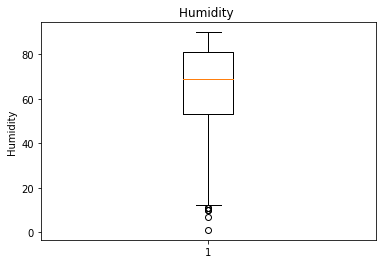

The lower quartile of humidity is: 53.25
The upper quartile of humidity is: 81.0
The interquartile range of humidity is: 27.75
The the median of humidity is: 69.0 
Values below 25.5 could be outliers.
Values above 108.75 could be outliers.
Potential outliers
Int64Index([  9,  25,  28,  44,  91, 114, 177, 197, 213, 232, 240, 249, 263,
            309, 317, 323, 335, 352, 360, 382, 393, 404, 422, 423, 428, 431,
            451, 481, 492, 540, 544, 553, 575, 577, 586, 589, 608],
           dtype='int64')


In [175]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
fig1, ax1 = plt.subplots()
ax1.set_title('Humidity ')
ax1.set_ylabel('Humidity')
ax1.boxplot(df['humidity'])
plt.show()

quartiles = df['humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1*iqr)
upper_bound = upperq + (1*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("Potential outliers")
print(df[(df['humidity']<lower_bound) | (df['humidity']>upper_bound)  ].index)

df.drop(df[(df['humidity']<lower_bound) | (df['humidity']>upper_bound)  ].index,inplace=True)

In [176]:
# Extract relevant fields from the data frame
df.to_csv('City_data.csv')

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [177]:
def plotter_tam(x,y,marker,color,title,xlabel,ylabel):
    plt.scatter(x, y, marker=marker,c=color)


    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)

    # Save the figure
    plt.savefig(f"{title}.png")

    # Show plot
    plt.show()

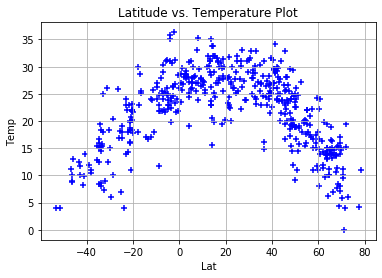

In [178]:
plotter_tam(df["lat"], df["temp"],"+","b","Latitude vs. Temperature Plot","Lat","Temp")
    

## Latitude vs. Humidity Plot

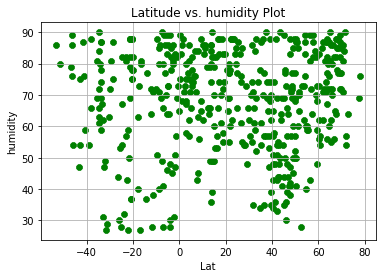

In [179]:
plotter_tam(df["lat"], df["humidity"],"8","g","Latitude vs. humidity Plot","Lat","humidity")

## Latitude vs. Cloudiness Plot

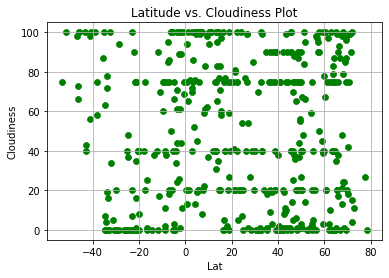

In [180]:
plotter_tam(df["lat"], df["cloud"],"8","g","Latitude vs. Cloudiness Plot","Lat","Cloudiness")

## Latitude vs. Wind Speed Plot

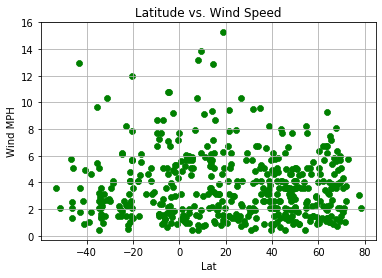

In [181]:
plotter_tam(df["lat"], df["wind"],"8","g","Latitude vs. Wind Speed","Lat","Wind MPH")

## Linear Regression

In [182]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg_tam(x,y,color,title,xlabel,ylabel):   
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,c=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [183]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = df[df["lat"] >= 0]

southern_hemisphere = df[df["lat"] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

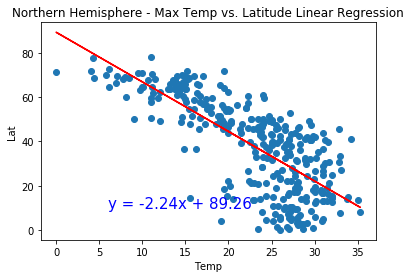

In [184]:
reg_tam(northern_hemisphere["temp"],northern_hemisphere["lat"],"b","Northern Hemisphere - Max Temp vs. Latitude Linear Regression","Temp","Lat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

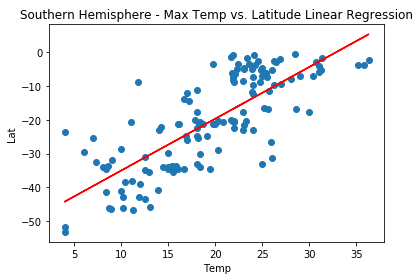

In [185]:
reg_tam(southern_hemisphere["temp"],southern_hemisphere["lat"],"b","Southern Hemisphere - Max Temp vs. Latitude Linear Regression","Temp","Lat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

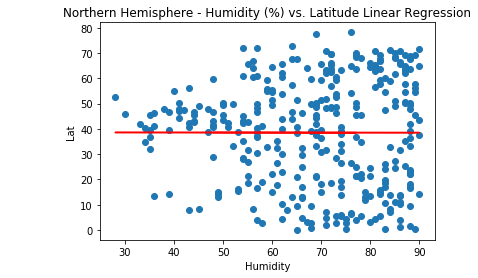

In [186]:
reg_tam(northern_hemisphere["humidity"],northern_hemisphere["lat"],"b","Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression","Humidity","Lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

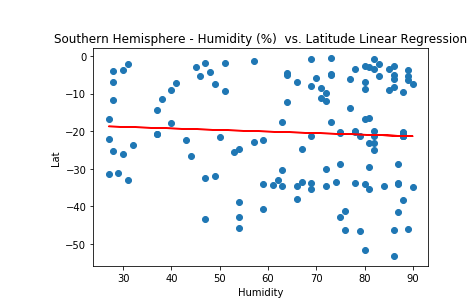

In [187]:
reg_tam(southern_hemisphere["humidity"],southern_hemisphere["lat"],"b","Southern Hemisphere - Humidity (%)  vs. Latitude Linear Regression","Humidity","Lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

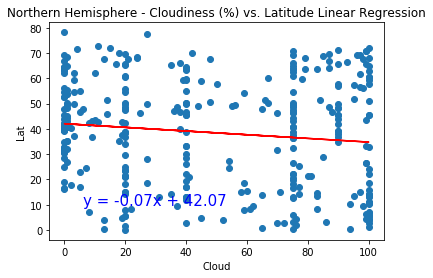

In [188]:
reg_tam(northern_hemisphere["cloud"],northern_hemisphere["lat"],"b","Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression","Cloud","Lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

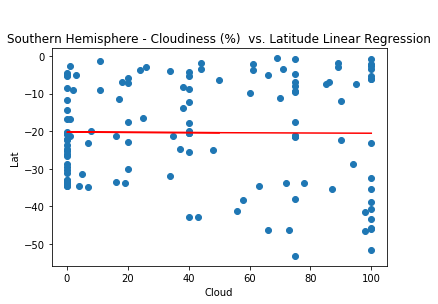

In [189]:
reg_tam(southern_hemisphere["cloud"],southern_hemisphere["lat"],"b","Southern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression","Cloud","Lat")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

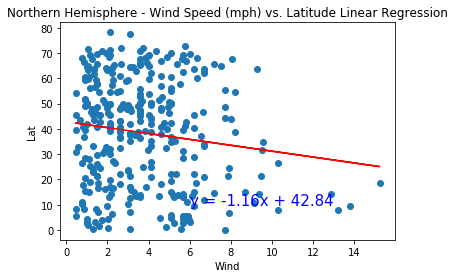

In [190]:
reg_tam(northern_hemisphere["wind"],northern_hemisphere["lat"],"b","Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression","Wind","Lat")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

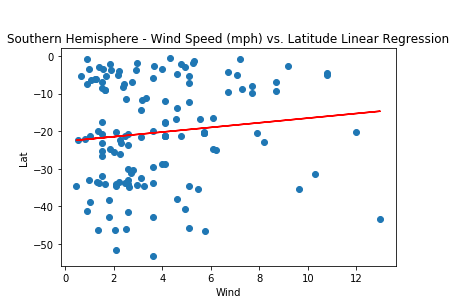

In [191]:
reg_tam(southern_hemisphere["wind"],southern_hemisphere["lat"],"b","Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression","Wind","Lat")